<a href="https://colab.research.google.com/github/SandeepH2706/ML_playground/blob/main/Supervised_Regression_using_Machine_Learning(characteristics_of_electric_vehicle_(EV)_batteries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
> This dataset contains data related to the charging characteristics of electric vehicle (EV) batteries. The dataset includes various factors affecting battery performance, degradation, and charging duration, along with the target variable representing the optimal charging duration classification. The data is organized with both numerical and categorical features and is designed for analysis or prediction tasks.


##Features:
1.SOC (%):  State-of-Charge of the EV battery, expressed as a percentage. This indicates the current charge level of the battery.

2.Voltage (V): Voltage of the battery during charging, measured in volts (V).

3.Current (A): The current (in amperes) flowing into the battery during the charging process.

4.Battery Temp (°C): The temperature of the battery during charging, measured in degrees Celsius (°C).

5.Ambient Temp (°C): The surrounding temperature of the environment in which the EV is being charged.

6.Charging Duration (min): The duration (in minutes) of the battery charging process.

7.Degradation Rate (%): A computed value representing the degradation rate of the battery, which affects its overall efficiency and charging capacity. This is calculated based on the charging duration, SOC, and battery temperature.
Charging Mode: A categorical feature representing the charging mode used during the process. This can be one of three values: 'Fast', 'Normal', or 'Slow'.

8.Efficiency (%): Battery efficiency calculated based on the degradation rate. The higher the degradation, the lower the efficiency.
Battery Type: The type of battery used in the EV. This feature has two possible values: 'Li-ion' (Lithium-ion) and 'LiFePO4' (Lithium Iron Phosphate).

9.Charging Cycles: The number of charging cycles the battery has undergone. A charging cycle is counted when the battery goes from full charge to empty and back to full charge.
EV Model: The model of the electric vehicle, which can be one of the following: 'Model A', 'Model B', or 'Model C'.

10.Optimal Charging Duration Class: The target variable representing the classification of the optimal charging duration:

  Short (0): Charging duration is short (≤ 40 minutes).

  Medium (1): Charging duration is moderate (≤ 80 minutes).

  Long (2): Charging duration is long (> 80 minutes).



##Step 1: Set up the environment

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

##Step 2: Load and explore the dataset

In [ ]:
# Load dataset
url = 'ev_battery_charging_data.csv'  # Replace with your dataset path or URL
data = pd.read_csv(url)
# Display the first few rows of the dataset
data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


##Step 3: Preprocessing the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values (if any)
# Calculate the mean only for numeric columns
numeric_data = data.select_dtypes(include=np.number)
# print(numeric_data)
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())


# Encode categorical columns using LabelEncoder
categorical_columns = ['Charging Mode', 'Battery Type', 'EV Model']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split the data into features and target variable
X = data.drop('Optimal Charging Duration Class', axis=1)
y = data['Optimal Charging Duration Class']

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



##Step 4: Train a Classification Model

In [ ]:
#Random Forest Classifie
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred = rf_classifier.predict(X_test)
# print(y_pred)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[32  1  0]
 [ 0 90  0]
 [ 0  0 77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      0.99        90
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


Accuracy: 0.995


##Step 5: Visualize the results

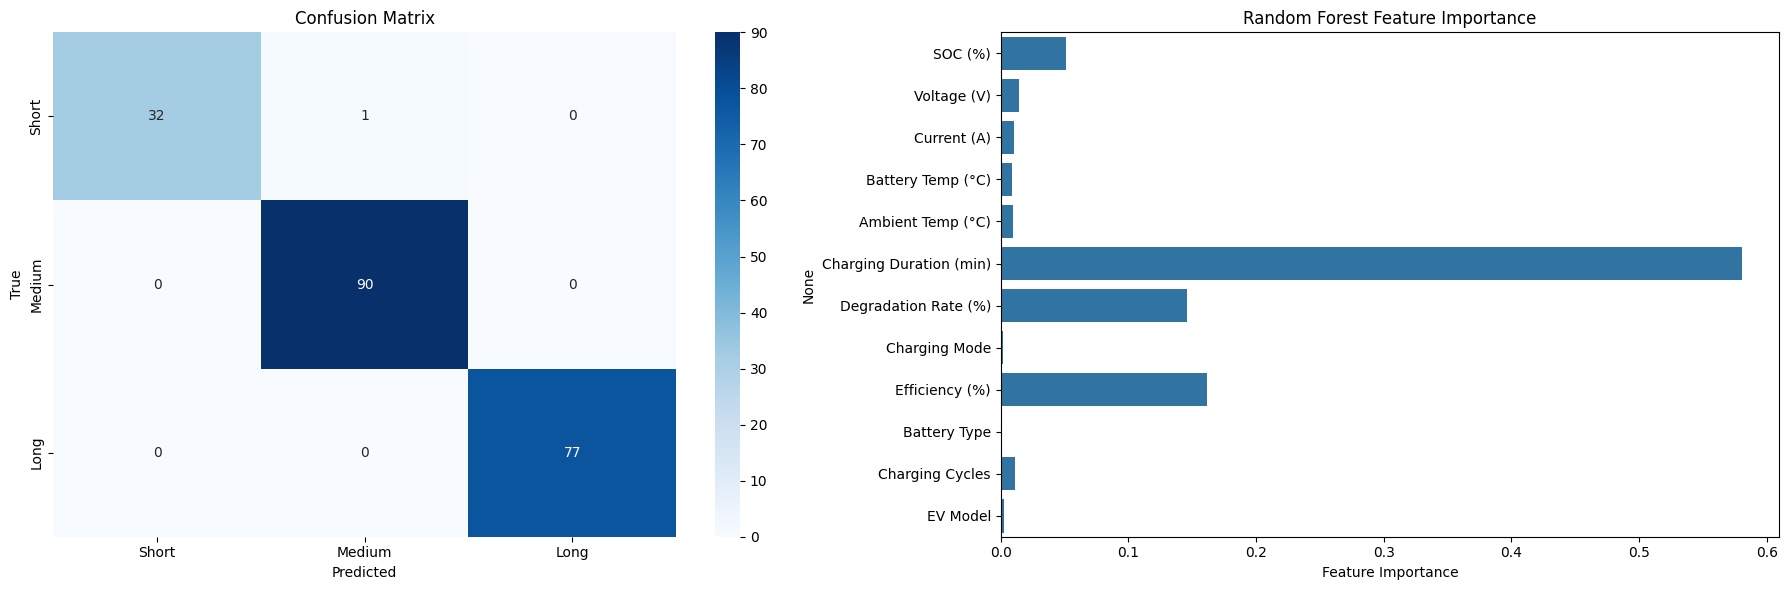

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Confusion Matrix visualization on the first subplot (axes[0])
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Short', 'Medium', 'Long'],
            yticklabels=['Short', 'Medium', 'Long'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix')

# Feature Importance visualization on the second subplot (axes[1])
feature_importances = rf_classifier.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features, ax=axes[1])
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Random Forest Feature Importance')

# Adjust layout and display the plots
plt.tight_layout()  # Ensures subplots don't overlap
plt.show()

## Take in the specified columns as arguments and train the model accordingly.

In [ ]:
# List of all available columns
columns = [
    'SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)',
    'Charging Duration (min)', 'Degradation Rate (%)', 'Charging Mode', 'Efficiency (%)',
    'Battery Type', 'Charging Cycles', 'EV Model', 'Optimal Charging Duration Class'
]

Function to preprocess the data (handle missing values and encode categorical features)

In [ ]:
def preprocess_data(selected_columns):
    # Select features and target variable
    X = data[selected_columns]
    y = data['Optimal Charging Duration Class']


    # numeric_data = [X[i].select_dtypes(include=np.number) for i in range(len(X))]
    # # print(numeric_data)
    # data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())
    # numeric_data_y = y.select_dtypes(include=np.number)
    # data[numeric_data_y.columns] = data[numeric_data_y.columns].fillna(numeric_data_y.mean())

    # Handle missing values (if any)
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mode()[0], inplace=True)

    # Encode categorical columns using LabelEncoder
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

    # Normalize numerical features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

Function to train the model

In [ ]:
# Function to train the model
def train_model(X_train, y_train, n_estimators=100, random_state=42):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

Function to predict the test data

In [ ]:
def predict_model(rf_classifier, X_test):
    y_pred = rf_classifier.predict(X_test)
    return y_pred

Function to calculate and print evaluation metrics (accuracy, precision, recall)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision =precision_score(y_test, y_pred, average='weighted')
    recall =recall_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Classification Report:\n", classification_report(y_test, y_pred))

Function to plot a scatter plot of Actual vs Predicted values

In [ ]:
def plot_scatter_pride(actual_values, predicted_values):
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

    # Define pride colors (you can adjust these)
    # actual_color = 'black'  # Example: Red for actual values
    # predicted_color = 'green'  # Example: Blue for predicted values

    # Map class labels to colors
    class_colors = {
        0: 'red',  # Short charging duration
        1: 'green',  # Medium charging duration
        2: 'blue'  # Long charging duration
    }

    # Scatter plot with color-coded classes
    plt.scatter(actual_values, predicted_values,
                c=[class_colors[label] for label in actual_values],  # Color based on actual class
                alpha=0.6, label='Predictions', marker='o')

    # Add a diagonal line for reference (perfect predictions)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)],
             linestyle='--', color='gray', label='Perfect Predictions')

    plt.xlabel('Actual Charging Duration Class')
    plt.ylabel('Predicted Charging Duration Class')
    plt.title('Scatter Plot: Actual vs Predicted Charging Duration')
    plt.xticks([0, 1, 2], ['Short', 'Medium', 'Long'])  # Set x-axis ticks to class labels
    plt.yticks([0, 1, 2], ['Short', 'Medium', 'Long'])  # Set y-axis ticks to class labels
    plt.legend()
    plt.grid(True)  # Add a grid for better readability
    plt.show()

Function to plot a confusion matrix heatmap

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Short', 'Medium', 'Long'], yticklabels=['Short', 'Medium', 'Long'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

### Main function to train, predict, and evaluate the model

In [ ]:
def main(selected_columns):
    # Preprocess the data
    X_scaled, y = preprocess_data(selected_columns)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the model
    rf_classifier = train_model(X_train, y_train,50,10)

    # Make predictions
    y_pred = predict_model(rf_classifier, X_test)

    # Evaluate the model
    evaluate_model(y_test, y_pred)

    # Plot the scatter plot (Actual vs Predicted)
    plot_scatter_pride(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred)

Specify the columns you want to use for training

<ipython-input-40-e34a58751dec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Accuracy: 0.995
Precision: 0.9950549450549451
Recall: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      0.99        90
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



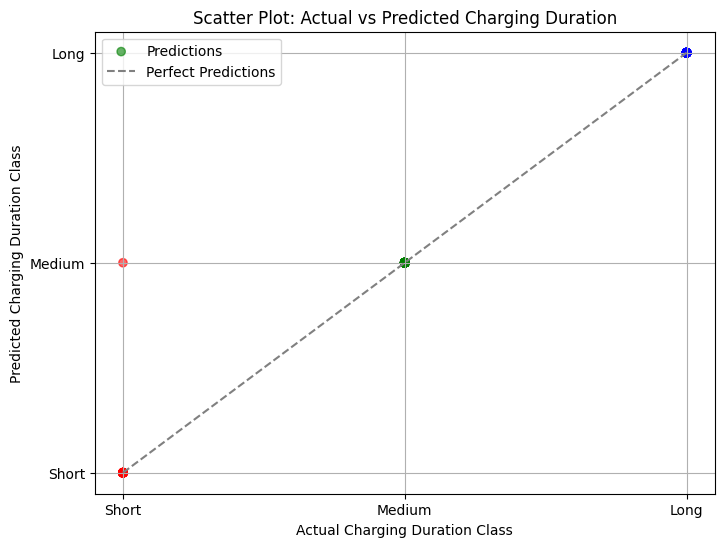

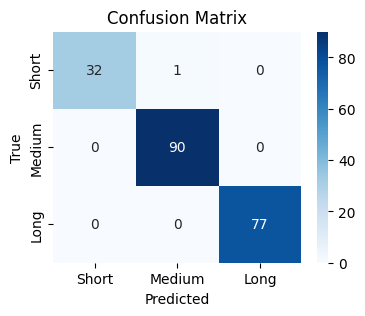

In [ ]:
selected_columns = [ 'Battery Temp (°C)', 'Ambient Temp (°C)',
    'Charging Duration (min)', 'Charging Mode', 'Efficiency (%)',
    'Battery Type', 'Charging Cycles']
main(selected_columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


class EVBatteryModel:
    def __init__(self, data_path, n_estimators=100, random_state=42, test_size=0.2):
        self.data_path = data_path
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.test_size = test_size
        self.data = pd.read_csv(self.data_path)
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.rf_classifier = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)

    def preprocess_data(self, selected_columns):
      X = self.data[selected_columns]
      y = self.data['Optimal Charging Duration Class']

      # Separate numerical and categorical columns
      numerical_cols = X.select_dtypes(include=np.number).columns
      categorical_cols = X.select_dtypes(include=['object']).columns

      # Fill missing values for numerical columns with mean
      X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())
      # Fill missing values for categorical columns with mode
      X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

      # Encode categorical features
      for col in categorical_cols:
          le = LabelEncoder()
          X[col] = le.fit_transform(X[col])
          self.label_encoders[col] = le

      # Normalize numerical features
      X_scaled = self.scaler.fit_transform(X)

      return X_scaled, y

    def train_model(self, X_train, y_train):
        self.rf_classifier.fit(X_train, y_train)
        return self.rf_classifier

    def predict_model(self, X_test):
        return self.rf_classifier.predict(X_test)

    def evaluate_model(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("Classification Report:\n", classification_report(y_test, y_pred))

    def plot_scatter_pride(self, actual_values, predicted_values):
        plt.figure(figsize=(8, 6))
        class_colors = {0: 'red', 1: 'green', 2: 'blue'}
        plt.scatter(actual_values, predicted_values, c=[class_colors[label] for label in actual_values],
                    alpha=0.6, label='Predictions', marker='o')
        plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)],
                 linestyle='--', color='gray', label='Perfect Predictions')
        plt.xlabel('Actual Charging Duration Class')
        plt.ylabel('Predicted Charging Duration Class')
        plt.title('Scatter Plot: Actual vs Predicted Charging Duration')
        plt.xticks([0, 1, 2], ['Short', 'Medium', 'Long'])
        plt.yticks([0, 1, 2], ['Short', 'Medium', 'Long'])
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_confusion_matrix(self, y_test, y_pred):
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Short', 'Medium', 'Long'],
                    yticklabels=['Short', 'Medium', 'Long'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    def run(self, selected_columns):
        X_scaled, y = self.preprocess_data(selected_columns)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=self.test_size, random_state=self.random_state
        )
        self.train_model(X_train, y_train)
        y_pred = self.predict_model(X_test)
        self.evaluate_model(y_test, y_pred)
        self.plot_scatter_pride(y_test, y_pred)
        self.plot_confusion_matrix(y_test, y_pred)





In [ ]:
# Example usage
model = EVBatteryModel('ev_battery_charging_data.csv', n_estimators=50, random_state=10)
selected_cols = ['SOC (%)', 'Charging Mode', 'Battery Type']
model.run(selected_cols)